In [50]:
import numpy as np
import matplotlib.pyplot as plt
X_train = np.load("reshaped_28.npy")

In [55]:
hidden_nodes = 225
middle = 100
lr = 1e-5
samples = 60000
input_size = 784
X = X_train.reshape(samples,input_size)
X = X/255.0
Lambda = 1
s = 0.05
# defining functions

def sigm(x):
    return 1/(1+np.exp(-x))

def diff_sigm(x):
    return (sigm(x)-(sigm(x)**2))

def layer(x,W,b):
    return np.matmul(x,W)+b

def backprop_last(output,label,out_penult):
    del1 = 2*(output-label)*diff_sigm(out_penult)
    return del1

def backprop_layer(prev_delta,out_prev):
    sn = -np.multiply(diff_sigm(out_prev),np.sum(prev_delta, axis=1).reshape(samples,1))
    return sn

W1 = np.random.normal(0,1,(input_size,hidden_nodes))
Bi1 = np.random.normal(0,1,(1,hidden_nodes))
# W2 = np.random.normal(0,1,(middle,hidden_nodes))
# Bi2 = np.random.normal(0,1,(1,hidden_nodes))
W3 = np.random.normal(0,1,(hidden_nodes,middle))
Bi3 = np.random.normal(0,1,(1,middle))
W4 = np.random.normal(0,1,(middle,input_size))
Bi4 = np.random.normal(0,1,(1,input_size))


In [56]:
epochs = 50
for i in range(epochs):
    loss = 0
    w1 = w2 = w3 = w4 = 0
    b1 = b2 = b3 = b4 = 0
    #forward pass
    out1 = layer(X,W1,Bi1)
    z = sigm(out1)
#     out2 = layer(m1,W2,Bi2)
#     z  = sigm(out2)
    out3 = layer(z,W3,Bi3)
    m2 = sigm(out3)
    out4 = layer(m2,W4,Bi4)
    y = sigm(out4)
    #BACKPROPAGATION
    del1 = backprop_last(y,X,out4)
    b4 = np.sum(del1, axis = 0).reshape(np.shape(Bi4))
    w4 = np.matmul(m2.T,del1)
    
    s3 = backprop_layer(del1,out3)
    w3 = np.matmul(z.T,s3)
    b3 = np.sum(s3,axis=0).reshape(np.shape(Bi3))
    #sparsity conditioning
    zm = np.mean(z,axis = 0)
    ge = (Lambda)*(-s/zm + (1-s)/(1-zm))*diff_sigm(out1)
    s1 = ge+backprop_layer(s3,out1)
    b1 = np.sum(s2,axis=0).reshape(np.shape(Bi1))
    w1 = np.matmul(X.T,s1)
    
#     s1 = backprop_layer(s2,out1)
#     w1 = np.matmul(X.T,s1)
#     b1 = np.sum(s1,axis=0).reshape(np.shape(Bi1))
    
    loss = np.sum(np.linalg.norm(y-X)**2)
    print(i,loss)
    W1 -= lr*w1
#     W2 -= lr*w2
    W3 -= lr*w3
    W4 -= lr*w4
    Bi1 -= lr*b1
#     Bi2 -= lr*b2
    Bi3 -= lr*b3
    Bi4 -= lr*b4
    

(0, 21602476.54052036)


/home/legion/.local/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


(1, 10837092.230582858)
(2, 9971512.622532142)
(3, 9449156.872405859)
(4, 9216352.02390193)
(5, 9071119.544553155)
(6, 9093109.52566703)
(7, 9006753.67719454)
(8, 9027665.545040106)
(9, 8976207.373593666)
(10, 8877912.311813954)
(11, 8844200.281147847)
(12, 8815662.031069828)
(13, 8793080.859156309)
(14, 8726114.238896424)
(15, 8733848.13257623)
(16, 8755553.82875853)
(17, 8745740.81133008)
(18, 8673266.65325048)
(19, 8616765.08512823)
(20, 8556584.891695613)
(21, 8553052.939476708)
(22, 8573931.353423182)
(23, 8573283.50597465)
(24, 8568381.3332624)
(25, 8592487.826495282)
(26, 8542825.997050425)
(27, 8540118.211050566)
(28, 8502218.735009465)
(29, 8474404.601176234)
(30, 8435651.740812337)
(31, 8434329.731250515)
(32, 8458931.866498517)
(33, 8448817.424396332)
(34, 8470175.18431128)
(35, 8386180.566491799)
(36, 8421514.925196642)
(37, 8446945.389447432)
(38, 8445408.786205422)
(39, 8447308.08447428)
(40, 8446380.165007968)
(41, 8473504.097993279)
(42, 8388478.923580998)
(43, 8388249.

In [57]:
out1 = layer(X,W1,Bi1)
z = sigm(out1)
# out2 = layer(m1,W2,Bi2)
# z  = sigm(out2)
out3 = layer(z,W3,Bi3)
m2 = sigm(out3)
out4 = layer(m2,W4,Bi4)
y = sigm(out4)

/home/legion/.local/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


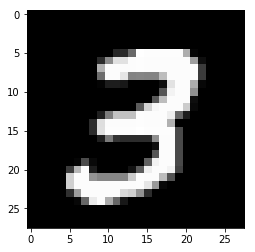

In [58]:
plt.imshow(X[7].reshape(28,28) , cmap='gray')

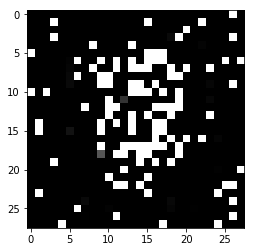

In [59]:
y = y*255.0
plt.imshow(y[7].reshape(28,28) , cmap='gray' )

In [60]:
count = 0
for i in range(len(z[1])):
    if(z[1][i] > 0.01):
        count += 1
print(count,len(z[1]))

print(np.mean(z[1]))

(0, 225)
1.4963931016844381e-58
